In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
cardataset=pd.read_csv("/content/car data.csv")

In [3]:
cardataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
cardataset.shape

(301, 9)

In [8]:
cardataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
cardataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
cardataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
print(cardataset.Fuel_Type.value_counts())
print(cardataset.Seller_Type.value_counts())
print(cardataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [15]:
cardataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
cardataset.replace({'Seller_Type':{'Dealer':0,"Individual":1}},inplace=True)
cardataset.replace({'Transmission':{'Manual':0,"Automatic":1}},inplace=True)

In [16]:
cardataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [20]:
X=cardataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=cardataset['Selling_Price']

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [22]:
linearregmodel=LinearRegression()

In [23]:
linearregmodel.fit(X_train,Y_train)

LinearRegression()

In [24]:
trainingprediction=linearregmodel.predict(X_train)

In [25]:
errorscore=metrics.r2_score(Y_train,trainingprediction)

In [26]:
print("R Squarred Error",errorscore)

R Squarred Error 0.8799451660493711


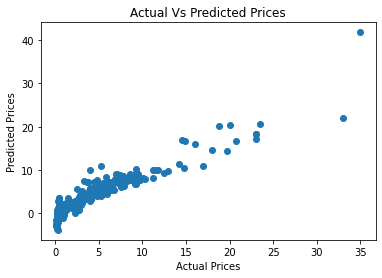

In [28]:
#Actual and predicted price
import matplotlib.pyplot as plt
plt.scatter(Y_train,trainingprediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual Vs Predicted Prices")
plt.show()

In [29]:
testprediction=linearregmodel.predict(X_test)
errorscore=metrics.r2_score(Y_test,testprediction)
print("R Squarred Error",errorscore)

R Squarred Error 0.8365766715027051


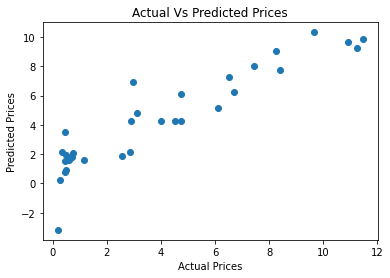

In [30]:
#Actual and predicted price
import matplotlib.pyplot as plt
plt.scatter(Y_test,testprediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual Vs Predicted Prices")
plt.show()

In [31]:
## Lasso regression

R Squarred Error 0.9148157845262993


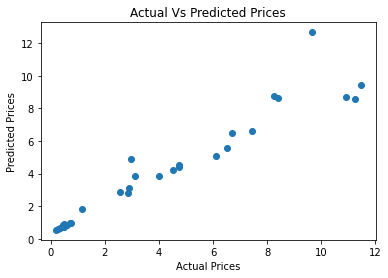

In [33]:
lassoregmodel=Lasso()
lassoregmodel.fit(X_test,Y_test)
testprediction=lassoregmodel.predict(X_test)
errorscore=metrics.r2_score(Y_test,testprediction)
print("R Squarred Error",errorscore)
plt.scatter(Y_test,testprediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actual Vs Predicted Prices")
plt.show()